In [39]:
import numpy as np
import typing as ty
import pandas as pd

In [40]:
"""
20条河流的水质情况数据
"""
df = pd.read_excel("20条河流的水质情况数据.xlsx")

In [41]:
"""
原始矩阵正向化
"""
#PH值，中间型指标7
x_best = 7
M = max(np.abs(np.array(df.iloc[:,2])-x_best))
for i in range(df.shape[0]):
    df.iloc[i,2] = 1-abs(df.iloc[i,2]-x_best)/M
#细菌总数，极小型指标
M = max(np.array(df.iloc[:,3]))
for i in range(df.shape[0]):
    df.iloc[i,3] = M-df.iloc[i,3]
#植物性营养物量，区间型指标[10,20]
a = 10
b = 20
M = max(a-min(np.array(df.iloc[:,4])),max(np.array(df.iloc[:,4]))-b)
for i in range(df.shape[0]):
    if df.iloc[i,4]<a:
        df.iloc[i,4] = 1-(a-df.iloc[i,4])/M
    elif df.iloc[i,4]>b:
        df.iloc[i,4] = 1-(df.iloc[i,4]-b)/M
    else:
        df.iloc[i,4] = 1
df

,河流,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm)
0,A,4.69,0.717241,3,1.000000
1,B,2.03,0.406897,35,0.694036
2,C,9.11,0.524138,8,0.905791
3,D,8.61,0.965517,8,0.444252
4,E,7.13,0.655172,4,0.691443
5,F,2.39,0.841379,16,0.600691
6,G,7.69,0.855172,16,0.655143
7,H,9.30,0.868966,27,0.000000
8,I,5.45,0.572414,49,1.000000
9,J,6.19,0.813793,37,0.784788


In [42]:
"""
正向化矩阵标准化
"""
for j in range(1,df.shape[1]):
    x = np.array(df.iloc[:,j])
    x = sum(np.float_power(x,2))**0.5
    for i in range(df.shape[0]):
        df.iloc[i,j] = df.iloc[i,j]/x
df


,河流,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm)
0,A,0.162186,0.248255,0.024544,0.306458
1,B,0.070200,0.140837,0.286347,0.212693
2,C,0.315035,0.181417,0.065451,0.277586
3,D,0.297744,0.334190,0.065451,0.136145
4,E,0.246564,0.226772,0.032725,0.211898
5,F,0.082649,0.291223,0.130902,0.184086
6,G,0.265930,0.295997,0.130902,0.200773
7,H,0.321605,0.300771,0.220896,0.000000
8,I,0.188468,0.198127,0.400886,0.306458
9,J,0.214058,0.281674,0.302710,0.240504


In [43]:
"""
转换为概率
"""
for j in range(1,df.shape[1]):
    x = np.array(df.iloc[:,j])
    x = sum(x)
    for i in range(df.shape[0]):
        df.iloc[i,j] = df.iloc[i,j]/x
df

,河流,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm)
0,A,0.039155,0.061141,0.006726,0.074984
1,B,0.016948,0.034685,0.078475,0.052041
2,C,0.076056,0.044680,0.017937,0.067920
3,D,0.071882,0.082305,0.017937,0.033312
4,E,0.059526,0.055850,0.008969,0.051847
5,F,0.019953,0.071723,0.035874,0.045042
6,G,0.064201,0.072898,0.035874,0.049125
7,H,0.077642,0.074074,0.060538,0.000000
8,I,0.045500,0.048795,0.109865,0.074984
9,J,0.051678,0.069371,0.082960,0.058846


In [44]:
"""
计算信息熵
"""
def log(x:np.array)->np.array:
    tmp = np.copy(x)
    for i in range(len(x)):
        tmp[i] = np.log(tmp[i])if tmp[i]!=0 else 0
    return tmp
e = np.ones((df.shape[1]))
for j in range(1,df.shape[1]):
    x = np.array(df.iloc[:,j])
    x = np.sum(x*log(x))
    e[j] = -1*x/(np.log(df.shape[0]))
d = (1-e)/sum(1-e)
d

array([0.        , 0.14106059, 0.22667469, 0.44093378, 0.19133094])

In [45]:
"""
20条河流的水质情况数据
"""
df = pd.read_excel("20条河流的水质情况数据.xlsx")
"""
原始矩阵正向化
"""
#PH值，中间型指标7
x_best = 7
M = max(np.abs(np.array(df.iloc[:,2])-x_best))
for i in range(df.shape[0]):
    df.iloc[i,2] = 1-abs(df.iloc[i,2]-x_best)/M
#细菌总数，极小型指标
M = max(np.array(df.iloc[:,3]))
for i in range(df.shape[0]):
    df.iloc[i,3] = M-df.iloc[i,3]
#植物性营养物量，区间型指标[10,20]
a = 10
b = 20
M = max(a-min(np.array(df.iloc[:,4])),max(np.array(df.iloc[:,4]))-b)
for i in range(df.shape[0]):
    if df.iloc[i,4]<a:
        df.iloc[i,4] = 1-(a-df.iloc[i,4])/M
    elif df.iloc[i,4]>b:
        df.iloc[i,4] = 1-(df.iloc[i,4]-b)/M
    else:
        df.iloc[i,4] = 1
"""
正向化矩阵标准化
"""
for j in range(1,df.shape[1]):
    x = np.array(df.iloc[:,j])
    x = sum(np.float_power(x,2))**0.5
    for i in range(df.shape[0]):
        df.iloc[i,j] = df.iloc[i,j]/x
"""
计算得分：加入熵权法所得权重
"""
df['Score'] = 0
Z_max = np.array([max(df.iloc[:,1]),max(df.iloc[:,2]),max(df.iloc[:,3]),max(df.iloc[:,4])])
Z_min = np.array([min(df.iloc[:,1]),min(df.iloc[:,2]),min(df.iloc[:,3]),min(df.iloc[:,4])])
for i in range(df.shape[0]):
    tmp = np.array(df.iloc[i,1:-1]).astype("float64")#y?
    D_max = np.sum(np.float_power(tmp-Z_max,2)*d[1:])**0.5
    D_min = np.sum(np.float_power(tmp-Z_min,2)*d[1:])**0.5
    df.iloc[i,5] = D_min/(D_min+D_max)
#归一化
df.iloc[:,5] /= sum(df.iloc[:,5])
df.sort_values(by="Score" , inplace=True, ascending=False)
df 

,河流,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm),Score
10,K,0.274229,0.219610,0.368161,0.214282,0.075469
8,I,0.188468,0.198127,0.400886,0.306458,0.074996
9,J,0.214058,0.281674,0.302710,0.240504,0.071626
11,L,0.152157,0.279287,0.302710,0.166075,0.065337
19,T,0.257284,0.169482,0.376342,0.083700,0.064323
14,O,0.070546,0.202901,0.253622,0.306458,0.057798
1,B,0.070200,0.140837,0.286347,0.212693,0.055222
12,M,0.257976,0.050128,0.253622,0.306458,0.054272
7,H,0.321605,0.300771,0.220896,0.000000,0.052506
16,Q,0.219591,0.207675,0.237259,0.055888,0.050550


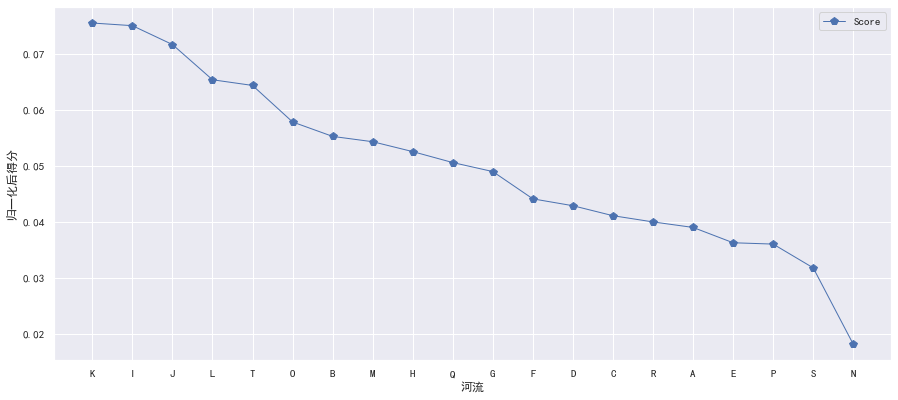

In [46]:
#绘图
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import rcParams
%matplotlib inline
sns.set_theme(style="darkgrid")
# 设定整个画布的尺寸
fig = plt.figure(figsize=(15,6.5))
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置x轴刻度间隔
# x_major_locator=MultipleLocator(25)
# ax = plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel("河流")
plt.ylabel("归一化后得分")
# plt.title("")
#绘图数据
x,y = df['河流'],df['Score']
plt.plot(x,y,'-p',label="Score",linewidth=1,markersize=8)
plt.legend()
plt.savefig("熵权法确定权重.jpg",format = 'jpg')

In [48]:
print(np.array(y))

[0.07546937 0.07499607 0.07162643 0.06533721 0.06432258 0.05779781
 0.05522169 0.0542715  0.0525058  0.05055008 0.04894246 0.04406747
 0.04284214 0.04106057 0.03994967 0.03896511 0.03622915 0.03599189
 0.0317465  0.0181065 ]
